<a href="https://colab.research.google.com/github/LarsStorholt/EmotionClassification/blob/main/LSMTemotionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('./emotions.csv')

In [ ]:
features = [col for col in data.columns if 'fft' in col]
X = data[features].values
y = data['label'].values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM [samples, time steps, features]
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))




In [ ]:
# Encode labels to one hot vectors
# 0 for 'NEGATIVE'
# 1 for 'NEUTRAL'
# 2 for 'POSITIVE'
y_encoded = pd.get_dummies(y).values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(y_encoded.shape[1], activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/20
54/54 [==============================] - 3s 16ms/step - loss: 0.3986 - accuracy: 0.8587 - val_loss: 0.2280 - val_accuracy: 0.9274
Epoch 2/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2129 - accuracy: 0.9302 - val_loss: 0.1966 - val_accuracy: 0.9227
Epoch 3/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1834 - accuracy: 0.9384 - val_loss: 0.1901 - val_accuracy: 0.9274
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1645 - accuracy: 0.9396 - val_loss: 0.1741 - val_accuracy: 0.9227
Epoch 5/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1471 - accuracy: 0.9460 - val_loss: 0.1626 - val_accuracy: 0.9368
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9543 - val_loss: 0.1443 - val_accuracy: 0.9415
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.9543 - val_loss: 0.1507 - val_accuracy: 0.9415
Epoch 8/20
54/54 [=

# Confusion Matrix
 0 for 'NEGATIVE',
 1 for 'NEUTRAL',
 2 for 'POSITIVE'

The model was trained to classify emotions based on the EEG data, and it should learn to differentiate between 'Negative', 'Neutral', and 'Positive' emotional states based on the EEG signals' patterns.

In [ ]:
predicted_probabilities = model.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

14/14 [==============================] - 1s 5ms/step


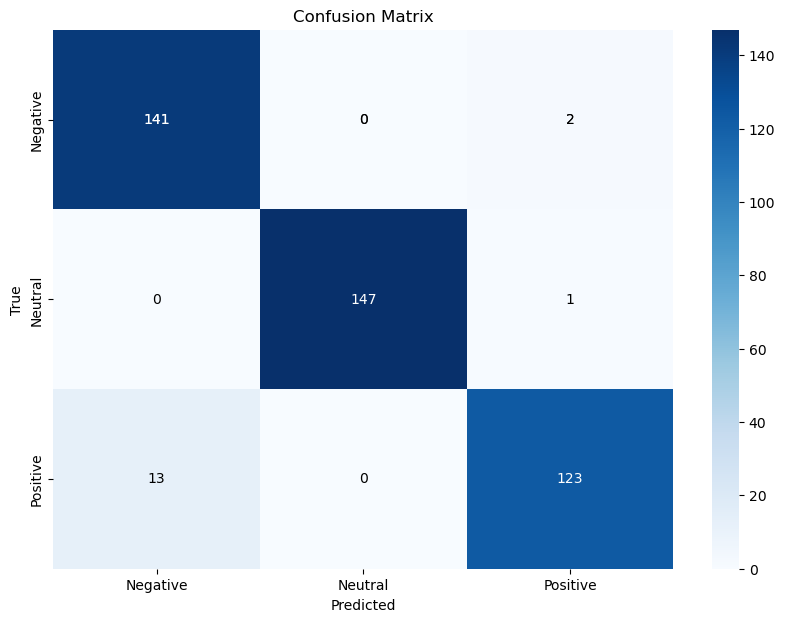

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

# Define the labels for your confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Function to apply color to annotation based on value
def get_annotation_color(value):
    if value > np.max(cm) / 2:
        return "white"  # White text for dark cells
    else:
        return "black"  # Black text for light cells

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,
                 vmin=0)  # Ensure the color scale starts at zero

# Loop over data dimensions and create text annotations with the correct color.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j+0.5, i+0.5, cm[i, j],
                ha="center", va="center",
                color=get_annotation_color(cm[i, j]))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
